### Imports

In [5]:
import random
import os
import re
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps
import matplotlib.pyplot as plt
import numpy as np

### Prepara listas de fontes e de palavras

In [6]:
# Lista fontes do windows (alterar pasta se necessário):
fontesPath = "C:\Windows\Fonts"
todasFontes = os.listdir(fontesPath)
# Filtra fontes 'interessantes':
fontesInteressantes = ['arial','times','cambria', \
                       'book','cent','comic','consolas', \
                       'corbel','cour','fra','gara', \
                       'georgia','letter','sans','minion', \
                       'myriad','tahoma','verdana','adobe']
fontes = []
for f in todasFontes:
    if any([s.lower() in f.lower() for s in fontesInteressantes]):
        fontes.append(f)
        
# Gera lista de palavras a partir de um livro
def limpa_string(s,l):
    out = ""
    for c in s:
        if c not in l:
            out += c
    return out

palavras = []
caracteresIndesejados = '"@#$%&*-_!/?\|!:;)(1234567890.><][}{+=,'
with open('jules_verne.txt','r') as f:
    for line in f:
        for word in line.split():
            palavras.append(limpa_string(word,caracteresIndesejados))
palavras = np.unique(palavras)

### Gera uma imagem em branco

In [3]:
im = Image.new('RGB',(26*16, 32*16),'white')
dsnh = ImageDraw.Draw(im)

### Insere lista de palavras aleatórias na imagem

In [4]:
lins = 70 #número de linhas a gerar
pals = 1 #número de palavras por linha
numSize = 9 #número de caracteres no número a gerar
whiteSpace = 8 #número de "espaços" entre palavra e número
greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
fontChoice = random.choice(fontes) #escolhe uma fonte aleatória

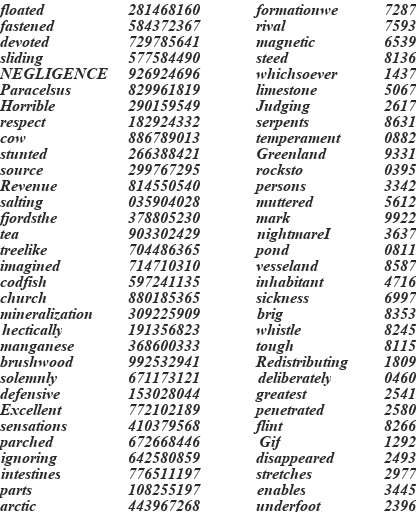

In [5]:
font = ImageFont.truetype(fontChoice, fontSize)
colPalavras = []
colNumeros = []
for l in range(2*lins):
    colPalavras.append(random.choice(palavras))
    colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

if im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)) < 0:
    posX = 0
else:
    posX = random.randint(0,im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)))
if im.size[1]-(lins)*fontSize < 0:
    posY = 0
else:
    posY = random.randint(0,im.size[1]-(lins)*fontSize)

for l in range(lins):
    dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
    dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
    dsnh.text(((posX+whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font)
    dsnh.text(((posX+3*whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)

im

#### Inverte cores da imagem:

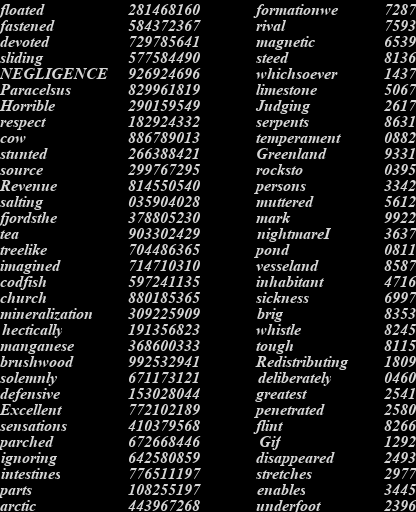

In [29]:
ImageOps.invert(im)

### Insere poluição na imagem

In [1]:
# Efeito de rasgo na página:
def rasgar(img,contraste):
    imagem = img.copy()
    lenRasgo = random.randint(100,imagem.size[0]//2)
    xInit = random.randint(0,imagem.size[0]-lenRasgo)
    yInit = random.randint(0,imagem.size[1])
    pixels = imagem.load()
    sinal=random.choice([-1,1])
    inclinacao = random.uniform(0.2,0.8)
    for p in range(xInit,xInit+lenRasgo):
        y = yInit
        tStrip = random.choice([0,1,2])   
        if random.random() <= inclinacao:
            y=y+sinal*tStrip
        else:
            y=y-sinal*tStrip
        for i in range(0-(tStrip//2),3+(tStrip//2)):
            greyness = random.randint(0,80)
            if (y+i)<10:
                y+=tStrip
            elif (y+i)>(imagem.size[1]-10):
                y-=tStrip
            #print("x: %d | y: %d"%(p,y+i))
            pixels[p,y+i] = (contraste,contraste,contraste)
        yInit = y
    return imagem

# Linhas horizontais aleatórias:
def lin_vertical(img,contraste):
    imagem = img.copy()
    pixels = imagem.load()
    numLins = random.randint(1,3)
    sinal=random.choice([-1,1])
    for l in range(numLins):
        thickness = random.randint(1,3)
        lengthLine = int(imagem.size[1]//random.uniform(1.1,1.6))
        yIni = random.randint(0,int(imagem.size[1]//random.uniform(15,30)))
        xPos = random.randint(20,int(imagem.size[0]-20))
        for p in range(yIni,yIni+lengthLine):
            if random.random() <= 0.005:
                xPos += sinal
            for l in range(0-(thickness//2),1+(thickness//2)):
                pixels[xPos+l,p] = (contraste,contraste,contraste)
    return imagem

# Linhas verticais aleatórias:
def lin_horizon(img,contraste):
    imagem = img.copy()
    pixels = imagem.load()
    numLins = random.randint(2,6)
    sinal=random.choice([-1,1])
    for l in range(numLins):
        thickness = random.randint(1,3)
        lengthLine = int(imagem.size[0]//random.uniform(1.1,6))
        xIni = random.randint(0,int(imagem.size[0]//random.uniform(2,30)))
        yPos = random.randint(20,int(imagem.size[1]-20))
        for p in range(yPos,yPos+lengthLine):
            if random.random() <= 0.005:
                yPos += sinal
            for l in range(0-(thickness//2),1+(thickness//2)):
                if p<0 or p>=imagem.size[0]-1:
                    break
                pixels[p,yPos+l] = (contraste,contraste,contraste)
    return imagem

# Pontilhados:
def pontilhados(img,contraste):
    imagem = img.copy()
    dsnh = ImageDraw.Draw(imagem)
    try:
        fontSize = random.randint(12,24)
        fontChoice = random.choice(fontes)
        font = ImageFont.truetype(fontChoice, fontSize)
    except:
        fontSize = random.randint(12,24)
        fontChoice = random.choice(fontes)
        font = ImageFont.truetype(fontChoice, fontSize)
    lins = random.randint(2,30)
    for l in range(1,lins):
        numPontos = random.randint(10,30)
        pt = int(imagem.size[0]-(numPontos+5)*fontSize)
        if pt < 0:
            pt = 0
        posX = random.randint(0,pt)
        dsnh.text((posX,random.randint(5,int(imagem.size[1]-15))),'.'*numPontos,(contraste,contraste,contraste),font=font)
    return imagem

# Sal e Pimenta
def salt_and_pepper(img):
    imagem = np.asarray(img)
    imagem.setflags(write=1)
    row,col,ch = imagem.shape
    s_vs_p = 0.5
    amount = 0.004
    # Salt mode
    num_salt = np.ceil(amount * imagem.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in imagem.shape]
    imagem[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* imagem.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in imagem.shape]
    imagem[coords] = 0
    return Image.fromarray(imagem[:,:,1],mode="L")

### Tornando produtivo:

In [2]:
def gera_imagem_limpa():
    im = Image.new('RGB',(26*16, 32*16),'white')
    dsnh = ImageDraw.Draw(im)
    lins = 70 #número de linhas a gerar
    pals = 1 #número de palavras por linha
    numSize = 9 #número de caracteres no número a gerar
    whiteSpace = 8 #número de "espaços" entre palavra e número
    try:
        fontSize = random.randint(10,18) #gera tamanho aleatório de fonte
        fontChoice = random.choice(fontes) #escolhe uma fonte aleatória
        font = ImageFont.truetype(fontChoice, fontSize)
    except:
        fontSize = random.randint(12,24) #gera tamanho aleatório de fonte
        fontChoice = random.choice(fontes) #escolhe uma fonte aleatória
        font = ImageFont.truetype(fontChoice, fontSize)
    greyness = random.randint(0,80) #gera tons de cinza aleatórios (mais que 50!)
    colPalavras = []
    colNumeros = []
    for l in range(2*lins):
        colPalavras.append(random.choice(palavras))
        colNumeros.append(''.join(["%s" % random.randint(0, 9) for num in range(0, numSize)]))

    if im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)) < 0:
        posX = 0
    else:
        posX = random.randint(0,im.size[0]-((max([len(x) for x in colPalavras])+1.5*whiteSpace+numSize)*fontSize*int(1.2)))
    if im.size[1]-(lins)*fontSize < 0:
        posY = 0
    else:
        posY = random.randint(0,im.size[1]-(lins)*fontSize)

    for l in range(lins):
        dsnh.text((posX,(posY+l*fontSize)),colPalavras[l],(greyness,greyness,greyness),font=font)
        dsnh.text((posX+2*whiteSpace*fontSize,(posY+l*fontSize)),colPalavras[l+lins],(greyness,greyness,greyness),font=font)
        dsnh.text(((posX+whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l],(greyness,greyness,greyness),font=font)
        dsnh.text(((posX+3*whiteSpace*fontSize),(posY+l*fontSize)),colNumeros[l+lins],(greyness,greyness,greyness),font=font)
    return im, greyness

In [3]:
def gera_limpa_e_poluida():
    im,contr = gera_imagem_limpa()
    limpa = im.copy()
    suja = lin_horizon(im,contr)
    if random.random()<=0.05:
        suja = rasgar(suja,contr)
    suja = lin_vertical(suja,contr)
    suja = pontilhados(suja,contr)
    suja = salt_and_pepper(suja)
    
    return limpa, suja

In [44]:
qtdArquivos = 30 #quantidade máxima de arquivos a serem gerados
for i in range(max([int(x.split('_')[1]) for x in os.listdir(os.path.join('imgs/teste')) if '_8' in x]), qtdArquivos):
    try:
        limpa, suja = gera_limpa_e_poluida()
        fileL = os.getcwd()+'\\imgs\\teste\\img_%05d_mask.jpg'%i
        fileS = os.getcwd()+'\\imgs\\teste\\img_%05d_8.jpg'%i
        if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
            print("Criando pasta imgs/teste")
            os.makedirs(os.getcwd()+'\\imgs\\teste')
        ImageOps.invert(limpa).save(fileL)
        suja.save(fileS)
        print('\rImagem %d/%d gerada com sucesso!            '%(i+1,qtdArquivos),end='',flush=True)
    except:
        print('\rerro encontrado, gerando nova imagem        ',end='',flush=True)
        limpa, suja = gera_limpa_e_poluida()
        fileL = os.getcwd()+'\\imgs\\teste\\img_%05d_mask.jpg'%i
        fileS = os.getcwd()+'\\imgs\\teste\\img_%05d_8.jpg'%i
        if not os.path.exists(os.getcwd()+'\\imgs\\teste'):
            print("Criando pasta imgs/teste")
            os.makedirs(os.getcwd()+'\\imgs\\teste')
        ImageOps.invert(limpa).save(fileL)
        suja.save(fileS)

Imagem 1/30 gerada com sucesso!            

c:\users\sofia\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:99: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
c:\users\sofia\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:105: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Imagem 30/30 gerada com sucesso!            

In [10]:
file_numbs = [int(x.split('_')[1]) for x in os.listdir(os.path.join('imgs/teste')) if '_8' in x]

In [15]:
max(file_numbs)

2799

In [17]:
for i in range (max(file_numbs)+1,max(file_numbs)+5):
    print(i)

2800
2801
2802
2803
